In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from idwr import idwr


In [147]:
#read file "amazon.csv"

arqle=pd.read_csv("datasets/amazon.csv",names=None,header=None)
vec=arqle.to_numpy();

x=-1*vec[:,1]  # this "-1" inversion is for the "amazon.csv" to be correctly plotted using sns.heatmap
y=vec[:,0]
z=vec[:,2]

In [148]:
#visualize input points

print(x)

[-62.924 -63.145 -69.869 -60.628 -60.016 -61.288 -60.026 -67.061]


In [149]:
print(y)

[0.987 4.097 6.65  3.295 3.104 5.789 2.057 0.125]


In [150]:
print(z) # the maximal irradiation is 2751.1W/m^2

[ 500.6 2748.1 1018.6 2087.6 2751.1 2610.5  504.2   89.9]


In [151]:
#create regular output grid with 50x50 points

npt=50
dx=(max(x)-min(x))/npt
dy=(max(y)-min(y))/npt
xx = np.arange(min(x), max(x),dx)
yy = np.arange(min(y), max(y), dy)
xnew, ynew = np.meshgrid(xx, yy)
xnew=xnew.reshape(npt*npt,1)[:,0]
ynew=ynew.reshape(npt*npt,1)[:,0]

In [152]:
# compute IDWR interpolation on the new points given in xx,yy

znew=idwr(x,y,z,xnew,ynew)

In [153]:
#convert flat output "znew" into a matrix

znew_mat=znew.reshape(50,50)

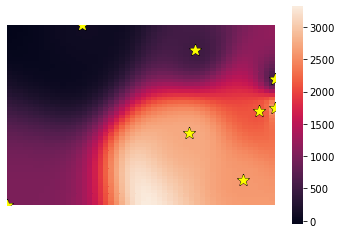

In [160]:
# visualize the result as a heatmap

fig = plt.figure()
ax = fig.add_subplot(111, aspect=0.67)
sns.heatmap(znew_mat,xticklabels=False,yticklabels=False)
for i in range(len(x)):
    ax.scatter(round((x[i]-min(x))/dx),round((y[i]-min(y))/dy), marker='*', s=150, color='black') 
    
for i in range(len(x)):
    ax.scatter(round((x[i]-min(x))/dx),round((y[i]-min(y))/dy), marker='*', s=100, color='yellow')     
    
# input points are shown in yellow    
# notice that irradiation values over 3000W/m^2 are predicted away from any input point